# Лабораторная работа № 4

__Выполнил:__ Баканов Д.С., группа 6231-010402D

In [94]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
data = pd.read_csv("housing.csv")
data["income_cat"] = np.ceil(data["median_income"] / 1.5)  # категория дохода
data["rooms_per_household"] = data["total_rooms"] / data["households"]  # количество комнат на дом
data["bedrooms_per_room"] = data["total_bedrooms"] / data["households"]  # количество спален по сравнению с комнатами
data["population_per_household"] = data["population"] / data["households"]  # население на дом
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,6.281853,1.081081,2.181467


In [67]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.093362,5.429000,1.097062,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.303707,2.474173,0.476104,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,0.846154,0.333333,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000,4.440716,1.006029,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000,5.229129,1.048889,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000,6.052381,1.099631,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,11.000000,141.909091,34.066667,1243.333333


In [68]:
data.nunique()

longitude                     844
latitude                      862
housing_median_age             52
total_rooms                  5926
total_bedrooms               1923
population                   3888
households                   1815
median_income               12928
median_house_value           3842
ocean_proximity                 5
income_cat                     11
rooms_per_household         19392
bedrooms_per_room           14121
population_per_household    18841
dtype: int64

In [69]:
# оставим 3 столбца: близость к океану, возраст дома и медианную цену на дом
housing = data[["housing_median_age", "ocean_proximity", "median_house_value"]]
housing.head()

,housing_median_age,ocean_proximity,median_house_value
0,41.0,NEAR BAY,452600.0
1,21.0,NEAR BAY,358500.0
2,52.0,NEAR BAY,352100.0
3,52.0,NEAR BAY,341300.0
4,52.0,NEAR BAY,342200.0


In [70]:
# сгруппируем по близости к океану и возрасту и вычислим среднюю медианную цену
house_value_by_ocean_proximity_and_age = housing.rename(columns={"median_house_value": "mean_median_house_value"}) \
                                                .groupby(["ocean_proximity", "housing_median_age"])["mean_median_house_value"] \
                                                .mean()
house_value_by_ocean_proximity_and_age.head(20)

ocean_proximity  housing_median_age
<1H OCEAN        2.0                   318605.421053
                 3.0                   298330.521739
                 4.0                   276417.810127
                 5.0                   273985.952941
                 6.0                   254979.064516
                 7.0                   250373.551020
                 8.0                   267568.159420
                 9.0                   246222.914286
                 10.0                  237173.102564
                 11.0                  235984.409639
                 12.0                  233518.762500
                 13.0                  244916.559633
                 14.0                  246430.811189
                 15.0                  233899.449438
                 16.0                  243718.619718
                 17.0                  234471.552083
                 18.0                  244963.850679
                 19.0                  241564.856481
          

In [71]:
# можем теперь посмотреть для каждой близости океана по возрасту дома цену
house_value_by_ocean_proximity_and_age.unstack('housing_median_age')

housing_median_age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0
ocean_proximity,,,,,,,,,,,,,,,,,,,,,
<1H OCEAN,NaN,318605.421053,298330.521739,276417.810127,273985.952941,254979.064516,250373.551020,267568.159420,246222.914286,237173.102564,...,214407.087719,230681.276243,243356.476510,222451.872727,196328.622449,242060.082353,246625.545455,246114.672727,286907.769231,293670.567976
INLAND,144300.0,173048.484848,175151.515152,170111.714286,148990.163934,157372.512500,153824.048077,144383.035714,136816.666667,131825.172185,...,107811.842105,128080.611940,122080.000000,134953.722222,109128.571429,111847.368421,126535.294118,110391.666667,98207.692308,130576.105556
ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388233.333333
NEAR BAY,NaN,220625.000000,289850.000000,239644.555556,289747.117647,209542.857143,209950.000000,246328.571429,243700.000000,216005.315789,...,184730.456522,197089.382979,188377.377358,208231.155556,214268.317073,275959.513514,201006.863636,223021.131579,248766.800000,308542.007987
NEAR OCEAN,NaN,186500.000000,404450.000000,257365.423077,223130.050000,249254.545455,262277.833333,205111.166667,229621.739130,256756.375000,...,249995.033333,284937.754098,261593.659574,224019.444444,245595.916667,256435.352941,275844.500000,261642.263158,313214.428571,267594.849624


In [72]:
# вычислим теперь для каждого положения медианный возраст и среднюю цену
house_value_and_age_by_ocean_proximity = housing.groupby(["ocean_proximity"])["housing_median_age", "median_house_value"] \
                                                .aggregate({"housing_median_age": ["median"], "median_house_value": ["mean"]})
house_value_and_age_by_ocean_proximity.rename(columns={
    "median_house_value": "mean_median_house_value",
    "housing_median_age": "median_housing_median_age",
})

,median_housing_median_age,mean_median_house_value
,median,mean
ocean_proximity,,
<1H OCEAN,30.0,240084.285464
INLAND,23.0,124805.392001
ISLAND,52.0,380440.000000
NEAR BAY,39.0,259212.311790
NEAR OCEAN,29.0,249433.977427


In [73]:
# рассмотрим близость к океану в зависимости от широты и долготы
ocean_proximity_latitude_longitude = data[["ocean_proximity", "longitude", "latitude"]]

In [74]:
# найдем приграничные точки
range_latitude_and_longitude_by_ocean_proximity = ocean_proximity_latitude_longitude.groupby(["ocean_proximity"])["longitude", "latitude"] \
                                                                                    .aggregate({"longitude": ["min", "max"], "latitude": ["min", "max"]})
range_latitude_and_longitude_by_ocean_proximity

longitude         latitude       
                      min     max      min    max
ocean_proximity                                  
<1H OCEAN         -124.14 -116.62    32.61  41.88
INLAND            -123.73 -114.31    32.64  41.95
ISLAND            -118.48 -118.32    33.33  33.43
NEAR BAY          -122.59 -122.01    37.35  38.34
NEAR OCEAN        -124.35 -116.97    32.54  41.95

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

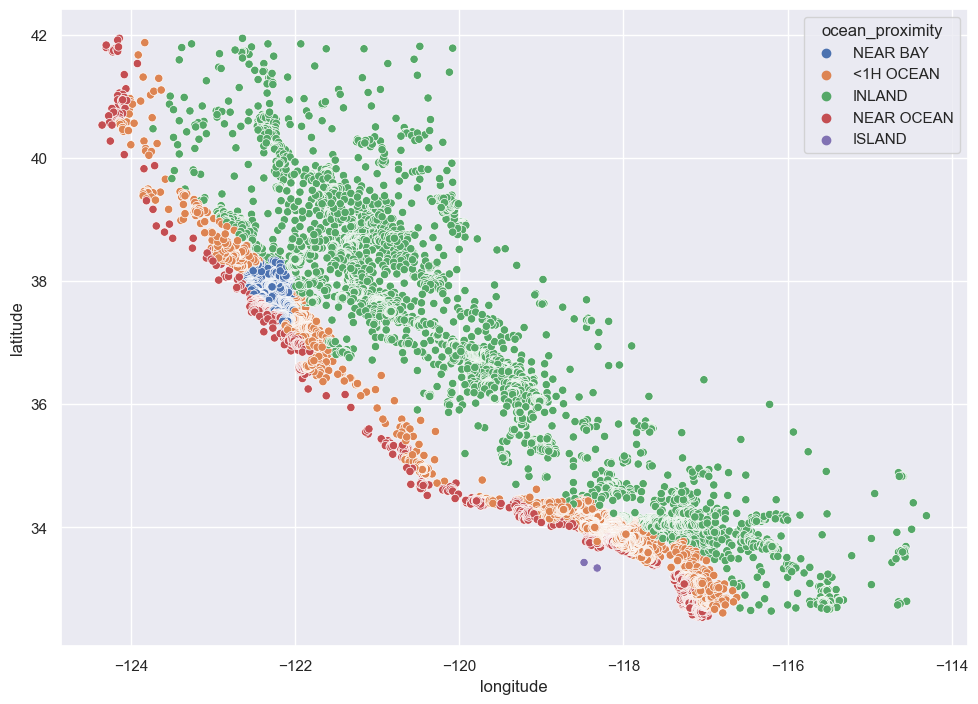

In [96]:
# попытаемся увидеть это на карте
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x="longitude", y="latitude", hue="ocean_proximity")